<a href="https://colab.research.google.com/github/rjatelo30/Machine-learning-2021/blob/main/Task_1_House_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from keras.layers import Dense
import matplotlib
import matplotlib.pyplot as plt
from keras.optimizers import Adam

**Import Dataset**

In [4]:
data = pd.read_csv('/content/Housing Pricing.csv')
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


In [5]:
data.drop('Id', inplace = True, axis = 1)

In [6]:
og_features = list(data.columns)
len(og_features)

76

**Check for missing values**

In [7]:
features_valmiss = data.columns[data.isna().any()]

len(features_valmiss)

15

In [8]:
bfill, mean_fill = [], []

**Check the percentage of missing values **

In [9]:
for feature in features_valmiss:
    print(feature,'', data[feature].isna().sum()/len(data)*100, '', data[feature].dtype)
    if data[feature].dtype == 'float64':
      mean_fill.append(feature)
    else:
        bfill.append(feature)

LotFrontage  17.73972602739726  float64
MasVnrType  0.547945205479452  object
MasVnrArea  0.547945205479452  float64
BsmtQual  2.5342465753424657  object
BsmtCond  2.5342465753424657  object
BsmtExposure  2.6027397260273974  object
BsmtFinType1  2.5342465753424657  object
BsmtFinType2  2.6027397260273974  object
Electrical  0.0684931506849315  object
FireplaceQu  47.26027397260274  object
GarageType  5.5479452054794525  object
GarageYrBlt  5.5479452054794525  float64
GarageFinish  5.5479452054794525  object
GarageQual  5.5479452054794525  object
GarageCond  5.5479452054794525  object


Fill the lists respectively with the method used as in the code above

In [10]:
bfill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [11]:
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(), inplace = True)

In [13]:
for feature in bfill:
  data[feature].fillna(method = 'bfill', inplace = True)

**Confirm that the empty cells have been filled**

In [14]:
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [15]:
data['FireplaceQu'].fillna(method = 'ffill', inplace = True)

**Encode the dataset**

In [16]:
cat_features = list(data.select_dtypes(include=['object']).columns)
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [17]:
numerical = list(set(og_features) - set(cat_features))
numerical

['GrLivArea',
 'EnclosedPorch',
 'MoSold',
 'BsmtFinSF2',
 'Fireplaces',
 'GarageYrBlt',
 'YrSold',
 'OpenPorchSF',
 'LotArea',
 '1stFlrSF',
 'KitchenAbvGr',
 'BsmtFinSF1',
 'OverallCond',
 'BsmtFullBath',
 'TotRmsAbvGrd',
 'LotFrontage',
 'MasVnrArea',
 'BedroomAbvGr',
 'GarageCars',
 'BsmtHalfBath',
 'ScreenPorch',
 'YearBuilt',
 'BsmtUnfSF',
 'HalfBath',
 'WoodDeckSF',
 'FullBath',
 'TotalBsmtSF',
 'PoolArea',
 'MiscVal',
 'GarageArea',
 'SalePrice',
 'MSSubClass',
 'OverallQual',
 'LowQualFinSF',
 '3SsnPorch',
 'YearRemodAdd',
 '2ndFlrSF']

In [18]:
nominal = ['MSZoning', 'LandContour', 'Neighborhood', 'LotConfig', 'RoofMatl']
ordinal = list(set(cat_features) - set(nominal))

In [19]:
target = ['SalePrice']

**Use corresponding encoding mechanisms with the matching data**

In [20]:
for feature in ordinal:
  data[feature] = data[feature].astype('category').cat.codes

df_ordinal = data[ordinal]
df_ordinal

,GarageQual,SaleType,BsmtFinType1,MasVnrType,CentralAir,FireplaceQu,BsmtCond,Heating,ExterQual,BsmtFinType2,BldgType,HouseStyle,Utilities,PavedDrive,GarageType,Condition2,Electrical,GarageFinish,GarageCond,SaleCondition,KitchenQual,LandSlope,Street,ExterCond,Exterior1st,LotShape,Condition1,Exterior2nd,HeatingQC,BsmtExposure,BsmtQual,RoofStyle,Functional,Foundation
0,4,8,2,1,1,4,3,1,2,5,0,5,0,2,1,2,4,1,4,4,2,0,1,4,12,3,2,13,0,3,2,1,6,2
1,4,8,0,2,1,4,3,1,3,5,0,2,0,2,1,2,4,1,4,4,3,0,1,4,8,3,1,8,0,1,2,1,6,1
2,4,8,2,1,1,4,3,1,2,5,0,5,0,2,1,2,4,1,4,4,2,0,1,4,12,0,2,13,0,2,2,1,6,2
3,4,8,0,2,1,2,1,1,3,5,0,5,0,2,5,2,4,2,4,0,2,0,1,4,13,0,2,15,2,3,3,1,6,0
4,4,8,2,1,1,4,3,1,2,5,0,5,0,2,1,2,4,1,4,4,2,0,1,4,12,0,2,13,0,0,2,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,8,5,2,1,4,3,1,3,5,0,5,0,2,1,2,4,1,4,4,3,0,1,4,12,3,2,13,0,3,2,1,6,2
1456,4,8,0,3,1,4,3,1,3,4,0,2,0,2,1,2,4,2,4,4,3,0,1,4,9,3,2,10,4,3,2,1,2,1
1457,4,8,2,2,1,2,1,1,0,5,0,5,0,2,1,2,4,1,4,4,2,0,1,2,5,3,2,5,0,3,3,1,6,4
1458,4,8,2,2,1,2,3,1,3,4,0,2,0,2,1,2,0,2,4,4,2,0,1,4,8,3,2,8,2,2,3,3,6,1


In [21]:
df_nominal = pd.get_dummies(data[nominal])
df_nominal

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1456,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1457,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1458,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [22]:
df_numerical = data[numerical]

In [23]:
new_data = pd.concat([df_nominal, df_ordinal, df_numerical], axis=1)

In [24]:
new_data.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofMatl_ClyTile,...,RoofStyle,Functional,Foundation,GrLivArea,EnclosedPorch,MoSold,BsmtFinSF2,Fireplaces,GarageYrBlt,YrSold,OpenPorchSF,LotArea,1stFlrSF,KitchenAbvGr,BsmtFinSF1,OverallCond,BsmtFullBath,TotRmsAbvGrd,LotFrontage,MasVnrArea,BedroomAbvGr,GarageCars,BsmtHalfBath,ScreenPorch,YearBuilt,BsmtUnfSF,HalfBath,WoodDeckSF,FullBath,TotalBsmtSF,PoolArea,MiscVal,GarageArea,SalePrice,MSSubClass,OverallQual,LowQualFinSF,3SsnPorch,YearRemodAdd,2ndFlrSF
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,6,2,1710,0,2,0,0,2003.0,2008,61,8450,856,1,706,5,1,8,65.0,196.0,3,2,0,0,2003,150,1,0,2,856,0,0,548,208500,60,7,0,0,2003,854
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,1,6,1,1262,0,5,0,1,1976.0,2007,0,9600,1262,1,978,8,0,6,80.0,0.0,3,2,1,0,1976,284,0,298,2,1262,0,0,460,181500,20,6,0,0,1976,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,6,2,1786,0,9,0,1,2001.0,2008,42,11250,920,1,486,5,1,6,68.0,162.0,3,2,0,0,2001,434,1,0,2,920,0,0,608,223500,60,7,0,0,2002,866


In [25]:
x = new_data.drop('SalePrice', 1)
y = data[target]

**Standardizing the data (normalization)**

In [26]:
reg = LassoCV()
reg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [27]:
newer_data = PowerTransformer().fit_transform(new_data)

test_data = pd.DataFrame(newer_data,columns=new_data.columns)
test_data = pd.concat([test_data[ordinal],test_data[numerical],test_data[target]],axis=1)
test_data

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


,GarageQual,SaleType,BsmtFinType1,MasVnrType,CentralAir,FireplaceQu,BsmtCond,Heating,ExterQual,BsmtFinType2,BldgType,HouseStyle,Utilities,PavedDrive,GarageType,Condition2,Electrical,GarageFinish,GarageCond,SaleCondition,KitchenQual,LandSlope,Street,ExterCond,Exterior1st,LotShape,Condition1,Exterior2nd,HeatingQC,BsmtExposure,BsmtQual,RoofStyle,Functional,Foundation,GrLivArea,EnclosedPorch,MoSold,BsmtFinSF2,Fireplaces,GarageYrBlt,YrSold,OpenPorchSF,LotArea,1stFlrSF,KitchenAbvGr,BsmtFinSF1,OverallCond,BsmtFullBath,TotRmsAbvGrd,LotFrontage,MasVnrArea,BedroomAbvGr,GarageCars,BsmtHalfBath,ScreenPorch,YearBuilt,BsmtUnfSF,HalfBath,WoodDeckSF,FullBath,TotalBsmtSF,PoolArea,MiscVal,GarageArea,SalePrice,MSSubClass,OverallQual,LowQualFinSF,3SsnPorch,YearRemodAdd,2ndFlrSF,SalePrice
0,0.229416,0.388981,-0.331851,-1.235238,0.263813,1.129776,0.295157,-0.098742,-1.148859,0.360040,-0.44347,1.018787,-0.02618,0.299252,-0.703851,-0.001447,0.307296,-0.278812,0.195977,0.032281,-0.708836,-0.237571,0.064238,0.372617,0.750372,0.752862,0.053417,0.759104,-0.956770,0.677875,-0.558697,-0.399795,0.271156,0.836707,0.528531,-0.407595,-1.694229,-0.359384,-1.027341,1.118270,0.140053,0.841820,-0.141171,-0.799624,-0.172658,0.797537,-0.477387,1.175573,0.946380,-0.156500,1.218044,0.170752,0.273835,-0.243940,-0.293785,1.151867,-0.887576,1.284128,-0.950337,0.797246,-0.404029,-0.069409,-0.192177,0.383899,0.571155,0.493460,0.667499,-0.134652,-0.129279,0.908055,1.170239,0.571155
1,0.229416,0.388981,-1.615804,0.382090,0.263813,1.129776,0.295157,-0.098742,0.768841,0.360040,-0.44347,-0.453441,-0.02618,0.299252,-0.703851,-0.001447,0.307296,-0.278812,0.195977,0.032281,0.931869,-0.237571,0.064238,0.372617,-0.647061,0.752862,-1.391852,-0.784551,-0.956770,-1.404286,-0.558697,-0.399795,0.271156,-0.542010,-0.382755,-0.407595,-0.444891,-0.359384,0.784005,-0.277361,-0.613715,-1.071307,0.105609,0.429151,-0.172658,1.011471,2.011352,-0.838866,-0.234627,0.536617,-0.827466,0.170752,0.273835,4.099375,-0.293785,0.006695,-0.434388,-0.773692,1.213714,0.797246,0.508177,-0.069409,-0.192177,-0.004602,0.227627,-1.164269,-0.042192,-0.134652,-0.129279,-0.621670,-0.871454,0.227627
2,0.229416,0.388981,-0.331851,-1.235238,0.263813,1.129776,0.295157,-0.098742,-1.148859,0.360040,-0.44347,1.018787,-0.02618,0.299252,-0.703851,-0.001447,0.307296,-0.278812,0.195977,0.032281,-0.708836,-0.237571,0.064238,0.372617,0.750372,-1.371959,0.053417,0.759104,-0.956770,-0.636438,-0.558697,-0.399795,0.271156,0.836707,0.659112,-0.407595,0.987490,-0.359384,0.784005,0.995940,0.140053,0.668453,0.413721,-0.568533,-0.172658,0.571325,-0.477387,1.175573,-0.234627,-0.011160,1.179948,0.170752,0.273835,-0.243940,-0.293785,1.055357,-0.048083,1.284128,-0.950337,0.797246,-0.253787,-0.069409,-0.192177,0.641990,0.741869,0.493460,0.667499,-0.134652,-0.129279,0.835594,1.172896,0.741869
3,0.229416,0.388981,-1.615804,0.382090,0.263813,-0.652025,-3.389331,-0.098742,0.768841,0.360040,-0.44347,1.018787,-0.02618,0.299252,1.388981,-0.001447,0.307296,1.016897,0.195977,-2.599251,-0.708836,-0.237571,0.064238,0.372617,1.157540,-1.371959,0.053417,1.500145,0.692110,0.677875,1.002516,-0.399795,0.271156,-1.959038,0.540797,2.456640,-1.694229,-0.359384,0.784005,0.818697,-1.368874,0.584540,0.095490,-0.429428,-0.172658,0.142272,-0.477387,1.175573,0.389921,-0.407405,-0.827466,0.170752,1.759713,-0.243940,-0.293785,-1.629540,0.183337,-0.773692,-0.950337,-1.025173,-0.644806,-0.069409,-0.192177,0.786092,-0.425386,0.698191,0.667499,-0.134652,-0.129279,-0.863478,1.146834,-0.425386
4,0.229416,0.388981,-0.331851,-1.235238,0.263813,1.129776,0.295157,-0.098742,-1.148859,0.360040,-0.44347,1.018787,-0.02618,0.299252,-0.703851,-0.001447,0.307296,-0.278812,0.195977,0.032281,-0.708836,-0.237571,0.064238,0.372617,0.750372,-1.371959,0.053417,0.759104,-0.956770,-1.746093,-0.558697,-0.399795,0.271156,0.836707,1.282894,-0.407595,1.963461,-0.359384,0.784005,0.936036,0.140053,0.991895,0.877127,0.124698,-0.172658,0.750541,-0.477387,1.175573,1.448615,0.708754,1.324337,1.382874,1.

**Feature Selection with L1 embedding**

In [28]:
x.shape

(1460, 117)

L1 selected only  11  features out of  117  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

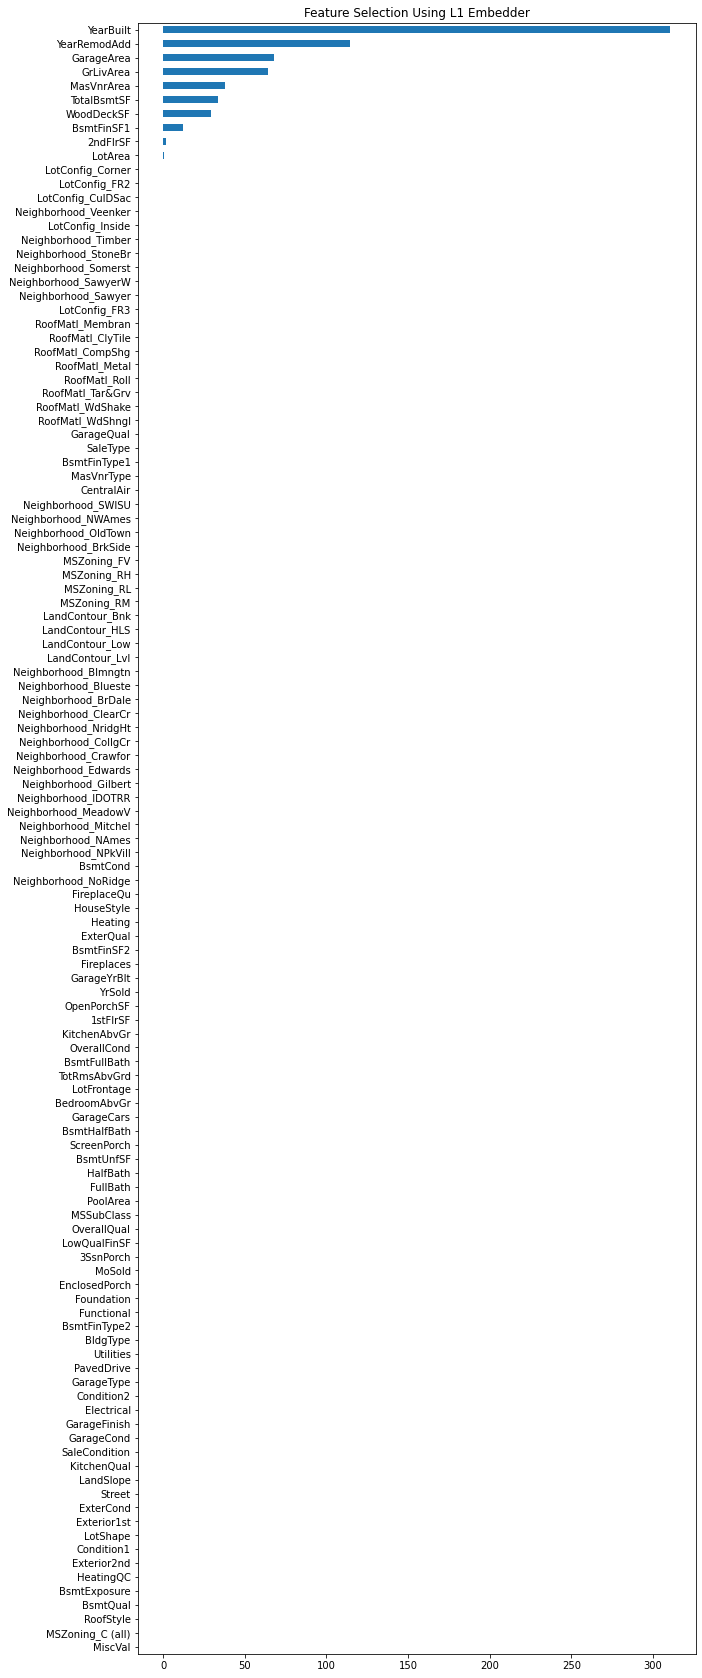

In [29]:
coef_col = pd.Series(reg.coef_,index = x.columns)

sorted_coef = coef_col.sort_values()
matplotlib.rcParams['figure.figsize']=(10.0,30.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

In [30]:
coef_col

MSZoning_C (all)     -0.000000
MSZoning_FV           0.000000
MSZoning_RH          -0.000000
MSZoning_RL           0.000000
MSZoning_RM          -0.000000
                       ...    
OverallQual           0.000000
LowQualFinSF         -0.000000
3SsnPorch             0.000000
YearRemodAdd        114.167259
2ndFlrSF              1.890278
Length: 117, dtype: float64

**Training a regression model using DFFA**

In [40]:
x = test_data.iloc[:, :-1].values
y = test_data.iloc[:, :1].values

In [41]:
xTrain, xTest,yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)

In [42]:
xTrain.shape

(1022, 71)

In [43]:
yTrain.shape

(1022, 1)

In [44]:
xTest.shape

(438, 71)

In [45]:
yTest.shape

(438, 1)

In [46]:
model = keras.Sequential(
    [
        layers.Dense(4, activation="relu"),
        layers.Dense(2, activation="relu"),
        layers.Dense(1, activation='sigmoid')
    ]
)

x1 = tf.ones((1022, 71))
y1 = model(x1)

model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae', 'mse'])

history = model.fit(xTrain, yTrain, epochs = 500, verbose = 0)

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 288       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [48]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.head()

,loss,mae,mse
0,1.382982,0.598023,1.382982
1,1.331058,0.557955,1.331058
2,1.295017,0.528549,1.295017
3,1.270456,0.505357,1.270456
4,1.253444,0.488462,1.253444
